# FINAL PROJECT

Investigate data
Ask questions
Wrangle data :
assess and clean data (Incorrect data types, missing data, and inaccurate data are all problems that we'd need to fix before analyzing this data)
Explore dataAnswer the following questions
Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?                                                                                                                                                                        
Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
Q4: What features are associated with better fuel economy (mpg)?
Q5:For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

## Importing Packages

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
#Loading the dataset
df08 = pd.read_csv('all_alpha_08.csv')
df18 = pd.read_csv('all_alpha_18.csv')

## DATA WRANGLING  

### Number of samples & columns in the fuel economy 2008 dataset 

In [172]:
print(df08.shape)
df08.head()

(2404, 18)


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


### Number of samples & columns in the fuel economy 2018 dataset 

In [173]:
print(df18.shape)
df18.head()

(1611, 18)


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


### Datatype of column in the fuel economy 2008 dataset 

In [174]:
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.2+ KB


### Datatype of column in the fuel economy 2018 dataset 

In [175]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 226.7+ KB


### Number of unique values for quality in fuel economy 2008 dataset 

In [176]:
df08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

### Number of unique values for quality in fuel economy 2018 dataset 

In [177]:
df18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

### Drop Extraneous Columns

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.

Columns to Drop:

From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'
From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

In [178]:
# drop unused columns from 2008 dataset
df08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [179]:
# drop unused columns from 2018 dataset
df18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis = 1, inplace = True)

df18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


### Rename Columns

Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency. Rename all column labels to replace spaces with underscores and convert everything to lowercase. 

In [180]:
# rename Sales Area to Cert Region
df08.rename(columns = {'Sales Area': 'Cert Region'}, inplace = True)

# confirm changes
df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [181]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [182]:
# replace spaces with underscores and lowercase labels for 2018 dataset

df18.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace = True)
# confirm changes
df18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [183]:
# confirm column labels for 2008 and 2018 datasets are identical
df08.columns == df18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [184]:
# make sure they're all identical like this
(df08.columns == df18.columns).all()

True

In [185]:
# view dimensions of dataset
df08.shape

(2404, 14)

In [186]:
# view dimensions of dataset
df18.shape

(1611, 14)

### Filter by Certification Region 

In [187]:
# filter datasets for rows following California standards
df08 = df08.query('cert_region == "CA"')

df18 = df18.query('cert_region == "CA"')

In [188]:
# drop certification region columns 
df08.drop('cert_region', axis = 1, inplace = True)
df18.drop('cert_region',axis=1,inplace=True)

In [189]:
df08.shape

(1084, 13)

In [190]:
df18.shape

(798, 13)

### Drop Rows with Missing Values¶ 

In [191]:
# drop rows with any null values in both datasets
df08.dropna(axis = 'index', inplace = True)
df18.dropna(axis = 'index', inplace = True)

In [192]:
# checks if any of columns in 2008 have null values 
df08.isnull().sum().any()

False

In [193]:
# checks if any of columns in 2018 have null values 
df18.isnull().sum().any()

False

### Dedupe Data¶ 

In [194]:
#check number of duplicates in 2008 and 2018 datasets
print(df08.duplicated().sum())
print(df18.duplicated().sum())

23
3


In [195]:
# drop duplicates in both datasets
df08.drop_duplicates(inplace = True)
df18.drop_duplicates(inplace = True)

In [196]:
#confirm changes
df08.duplicated().sum()

0

In [197]:
#confirm changes
df18.duplicated().sum()

0

### Inspecting Data Types 

In [198]:
# Datatype of column in the fuel economy 2008 dataset
df08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 13 columns):
model                   986 non-null object
displ                   986 non-null float64
cyl                     986 non-null object
trans                   986 non-null object
drive                   986 non-null object
fuel                    986 non-null object
veh_class               986 non-null object
air_pollution_score     986 non-null object
city_mpg                986 non-null object
hwy_mpg                 986 non-null object
cmb_mpg                 986 non-null object
greenhouse_gas_score    986 non-null object
smartway                986 non-null object
dtypes: float64(1), object(12)
memory usage: 107.8+ KB


In [199]:
# Datatype of column in the fuel economy 2018 dataset
df18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
Data columns (total 13 columns):
model                   794 non-null object
displ                   794 non-null float64
cyl                     794 non-null float64
trans                   794 non-null object
drive                   794 non-null object
fuel                    794 non-null object
veh_class               794 non-null object
air_pollution_score     794 non-null int64
city_mpg                794 non-null object
hwy_mpg                 794 non-null object
cmb_mpg                 794 non-null object
greenhouse_gas_score    794 non-null int64
smartway                794 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 86.8+ KB


### Fixing Datatypes

1) For air_pollution_score column: Need to convert strings to floats in the 2008 column and convert ints to floats in >the 2018 columns.

2) The following features need to be convereted to floats from strings for both dataset:
city_mpg,
hwy_mpg,
cmb_mpg

3) Need to convert string to ints in the 2008 column to make the greenhouse_gas_score columns in both datasets >consistent.

### 2008 DATASET

In [200]:
#let's get all the hybrids in 2008 dataset
hb_08 = df08[df08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,(6 cyl),Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [201]:
# hybrids in 2018
hb_18 = df18[df18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6.0,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6.0,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6.0,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8.0,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8.0,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8.0,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [202]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle


df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,(6 cyl),Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [203]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [204]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,(6 cyl),Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [205]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,(6 cyl),Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [206]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,(6 cyl),Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,(6 cyl),Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [207]:
# drop the original hybrid rows
df08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df08 = df08.append(new_rows, ignore_index=True)

In [208]:
# check that all the original hybrid rows with "/"s are gone
df08[df08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [209]:
df08.shape

(987, 13)

### 2018 DATASET 

In [210]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

In [211]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    
    df2[c] = df2[c].apply(lambda x: x.split('/')[1]) 

In [212]:
# append the two dataframes
new_rows = df1.append(df2)

In [213]:
# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
df18.drop(hb_18.index, inplace=True)

# append new_rows to df18
df18 = df18.append(new_rows)

In [214]:
# check that they're gone
df18[df18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [215]:
df18.shape

(832, 13)

### Continue the changes needed for air_pollution_score:
2008: convert string to float

2018: convert int to float

In [216]:
# convert string to float for 2008 air pollution column
df08['air_pollution_score'] = df08['air_pollution_score'].astype('float')

In [217]:
# convert int to float for 2018 air pollution column
df18['air_pollution_score'] = df18['air_pollution_score'].astype('int')

In [218]:
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
model                   987 non-null object
displ                   987 non-null float64
cyl                     987 non-null object
trans                   987 non-null object
drive                   987 non-null object
fuel                    987 non-null object
veh_class               987 non-null object
air_pollution_score     987 non-null float64
city_mpg                987 non-null object
hwy_mpg                 987 non-null object
cmb_mpg                 987 non-null object
greenhouse_gas_score    987 non-null object
smartway                987 non-null object
dtypes: float64(2), object(11)
memory usage: 100.4+ KB


### Fix city_mpg, hwy_mpg, cmb_mpg datatypes
2008 and 2018: convert string to float. 

In [219]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df18[c] = df18[c].astype('float')
    df08[c] = df08[c].astype('float')

### Fix greenhouse_gas_score datatype 

In [220]:
# convert from float to int
df08['greenhouse_gas_score'] = df08['greenhouse_gas_score'].astype('int') 

In [221]:
df08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [222]:
df18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int32
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

# Q1: Are more unique models using alternative sources of fuel? By how much?

In [223]:
df08['fuel'].value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [224]:
df18['fuel'].value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [225]:
alt_08 = df08.query('fuel in ["CNG", "ethanol"]')['model'].nunique()
alt_08

2

In [226]:
alt_18 = df18.query('fuel in ["Electricity", "Ethanol"]')['model'].nunique()
alt_18

26

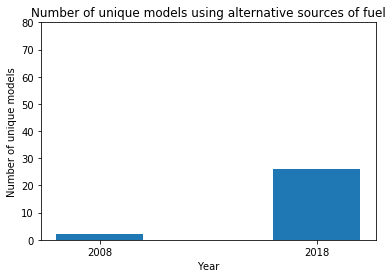

In [227]:
plt.bar(['2008', '2018'], [alt_08, alt_18], width = 0.4)
plt.title('Number of unique models using alternative sources of fuel')
plt.xlabel('Year')
plt.ylabel('Number of unique models')
plt.ylim(0, 80)
plt.show()

##### The number of unique models that use an alternative source of fuel since 2008 until 2018 is 26-2=24 models.

# Q2: How much have vehicle classes improved in fuel economy?

In [228]:
avg_08 = df08.groupby('veh_class')['cmb_mpg'].mean()

In [229]:
avg_18 = df18.groupby('veh_class')['cmb_mpg'].mean()

In [230]:
# The difference in fuel economy between 2008 and 2018
diff = avg_18 - avg_08
diff

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [231]:
#Remove null values rows
diff.dropna(inplace = True)

In [232]:
diff

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

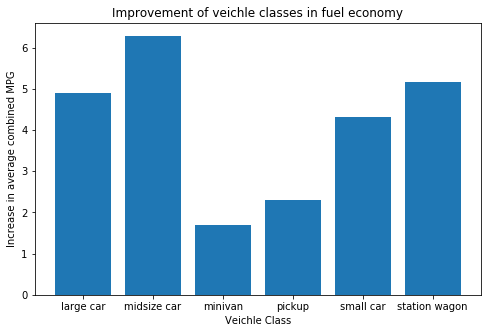

In [233]:
plt.figure(figsize = (8,5))
plt.bar(diff.index, diff)
plt.title('Improvement of veichle classes in fuel economy')
plt.xlabel('Veichle Class')
plt.ylabel('Increase in average combined MPG')
plt.show()

# Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (cmb_mpg & greenhouse_gas_score)

In [234]:
print(df08['smartway'].unique())
print(df18['smartway'].unique())

['no' 'yes']
['No' 'Yes' 'Elite']


In [235]:
smart_08 = df08.query('smartway == "yes"')
smart_18 = df18.query('smartway in ["Yes", "Elite"]')

In [236]:
smart_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,(6 cyl),Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
7,ACURA TSX,2.4,(4 cyl),Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
14,AUDI A3,2.0,(4 cyl),Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes


In [237]:
smart_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
34,AUDI A4 Ultra,2.0,4.0,AMS-7,2WD,Gasoline,small car,3,27.0,37.0,31.0,7,Yes
252,BUICK Encore,1.4,4.0,SemiAuto-6,2WD,Gasoline,small SUV,3,27.0,33.0,30.0,7,Yes
348,CHEVROLET Cruze,1.4,4.0,Man-6,2WD,Gasoline,small car,6,27.0,40.0,32.0,7,Yes
350,CHEVROLET Cruze,1.4,4.0,SemiAuto-6,2WD,Gasoline,small car,6,29.0,40.0,33.0,8,Yes
352,CHEVROLET Cruze,1.6,4.0,Auto-9,2WD,Diesel,small car,3,31.0,47.0,37.0,7,Yes


In [238]:
smart_08_green_mean = smart_08['greenhouse_gas_score'].mean()
smart_08_cmb_mean = smart_08['cmb_mpg'].mean()


print('The average greenhouse gas score for 2008 is', smart_08_green_mean)
print('The average combined MPG for 2008 is', smart_08_cmb_mean)

The average greenhouse gas score for 2008 is 6.868421052631579
The average combined MPG for 2008 is 23.736842105263158


In [239]:
smart_18_green_mean = smart_18['greenhouse_gas_score'].mean()
smart_18_cmb_mean = smart_18['cmb_mpg'].mean()

print('The average greenhouse gas score for 2018 is', smart_18_green_mean)
print('The average combined MPG for 2018 is', smart_18_cmb_mean)

The average greenhouse gas score for 2018 is 7.925925925925926
The average combined MPG for 2018 is 37.361111111111114


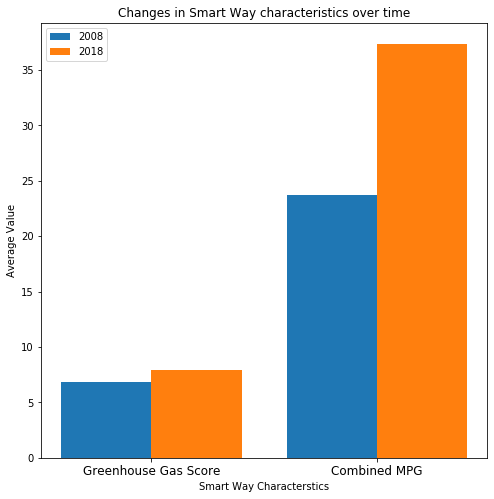

In [240]:
plt.figure(figsize = (8,8))
w = 0.4
bars = ['Greenhouse Gas Score', 'Combined MPG']
x_axis = np.arange(len(bars))
x_axis2 = [i+w for i in x_axis]

y1 = [smart_08_green_mean, smart_08_cmb_mean]
y2 = [smart_18_green_mean, smart_18_cmb_mean]

plt.bar(x_axis, y1, w, label = '2008')
plt.bar(x_axis2, y2 , w, label = '2018')

plt.title('Changes in Smart Way characteristics over time')
plt.xlabel('Smart Way Characterstics')
plt.ylabel('Average Value')
plt.xticks(x_axis + (w/2), bars, fontsize = 12)
plt.legend()
plt.show()

# Q4: What features are associated with better fuel economy (mpg)?

In [241]:
# Selecting the veichles that have more than 50% fuel economy
top_08 = df08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [242]:
top_18 = df18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


# Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most? 

In [243]:
# Renaming 2008 columns
df08.rename(columns = lambda x: x[:10] + '_2008', inplace = True)

In [244]:
df08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [245]:
# Merging datasets
df_combined = df08.merge(df18, left_on = 'model_2008', right_on = 'model')

In [246]:
# View to check merge
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 921
Data columns (total 26 columns):
model_2008              922 non-null object
displ_2008              922 non-null float64
cyl_2008                922 non-null object
trans_2008              922 non-null object
drive_2008              922 non-null object
fuel_2008               922 non-null object
veh_class_2008          922 non-null object
air_pollut_2008         922 non-null float64
city_mpg_2008           922 non-null float64
hwy_mpg_2008            922 non-null float64
cmb_mpg_2008            922 non-null float64
greenhouse_2008         922 non-null int32
smartway_2008           922 non-null object
model                   922 non-null object
displ                   922 non-null float64
cyl                     922 non-null float64
trans                   922 non-null object
drive                   922 non-null object
fuel                    922 non-null object
veh_class               922 non-null object
air_pollu

In [247]:
# Creating a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [248]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [249]:
# Creating a new column, `mpg_change`, with the change in mpg

model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [250]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [251]:
# Finding the vehicle that improved the most

change_max = model_mpg['mpg_change'].max()
change_max

16.53333333333334

In [252]:
model_mpg[model_mpg['mpg_change'] == change_max]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
